# Ntpl 0 0 4_Dimuon
Convert CMS open data from a TTree to RNTuple.
This tutorial illustrates data conversion and data processing with RNTuple and RDataFrame.  In contrast to the
LHCb open data tutorial, the data model in this tutorial is not tabular but entries have variable lengths vectors
Based on RDataFrame's df102_NanoAODDimuonAnalysis.C




**Author:** The ROOT Team  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 04:05 AM.</small></i>

Note: the rntuple classes are experimental at this point.
 Functionality, interface, and data format is still subject to changes.
 Do not use for real data!

In [1]:
%%cpp -d
#include <ROOT/RDataFrame.hxx>
#include <ROOT/RNTuple.hxx>
#include <ROOT/RNTupleDS.hxx>
#include <ROOT/RVec.hxx>

#include <TCanvas.h>
#include <TH1D.h>
#include <TLatex.h>
#include <TStyle.h>
#include <TSystem.h>

#include <cassert>
#include <cmath>
#include <iostream>
#include <memory>
#include <string>
#include <vector>
#include <utility>

input_line_26:2:10: fatal error: 'ROOT/RNTuple.hxx' file not found
#include <ROOT/RNTuple.hxx>
         ^~~~~~~~~~~~~~~~~~


Import classes from experimental namespace for the time being

In [2]:
using RNTupleReader = ROOT::Experimental::RNTupleReader;
using RNTupleWriter = ROOT::Experimental::RNTupleWriter;
using RNTupleDS = ROOT::Experimental::RNTupleDS;

constexpr char const* kTreeFileName = "http://root.cern.ch/files/NanoAOD_DoubleMuon_CMS2011OpenData.root";
constexpr char const* kNTupleFileName = "ntpl004_dimuon.root";


using ColNames_t = std::vector<std::string>;

input_line_27:1:43: error: no type named 'RNTupleReader' in namespace 'ROOT::Experimental'
using RNTupleReader = ROOT::Experimental::RNTupleReader;void __cling_Un1Qu32(void* vpClingValue) {
                      ~~~~~~~~~~~~~~~~~~~~^
input_line_27:3:43: error: no type named 'RNTupleWriter' in namespace 'ROOT::Experimental'
using RNTupleWriter = ROOT::Experimental::RNTupleWriter;
                      ~~~~~~~~~~~~~~~~~~~~^
input_line_27:4:39: error: no type named 'RNTupleDS' in namespace 'ROOT::Experimental'
using RNTupleDS = ROOT::Experimental::RNTupleDS;
                  ~~~~~~~~~~~~~~~~~~~~^


This is a custom action for rdataframe. it does not support parallelism!
 This action writes data from an RDataFrame entry into an ntuple. It is templated on the
 types of the columns to be written and can be used as a generic file format converter.

In [3]:
template <typename... ColumnTypes_t>
class RNTupleHelper : public ROOT::Detail::RDF::RActionImpl<RNTupleHelper<ColumnTypes_t...>> {
public:
   using Result_t = RNTupleWriter;
private:
   using ColumnValues_t = std::tuple<std::shared_ptr<ColumnTypes_t>...>;

   std::string fNTupleName;
   std::string fRootFile;
   ColNames_t fColNames;
   ColumnValues_t fColumnValues;
   static constexpr const auto fNColumns = std::tuple_size<ColumnValues_t>::value;
   std::shared_ptr<RNTupleWriter> fNTuple;
   int fCounter;

   template<std::size_t... S>
   void InitializeImpl(std::index_sequence<S...>) {
      auto eventModel = ROOT::Experimental::RNTupleModel::Create();
      // Create the fields and the shared pointers to the connected values
      std::initializer_list<int> expander{
         (std::get<S>(fColumnValues) = eventModel->MakeField<ColumnTypes_t>(fColNames[S]), 0)...};
      fNTuple = std::move(RNTupleWriter::Recreate(std::move(eventModel), fNTupleName, fRootFile));
   }

   template<std::size_t... S>
   void ExecImpl(std::index_sequence<S...>, ColumnTypes_t... values) {
      // For every entry, set the destination of the ntuple's default entry's shared pointers to the given values,
      // which are provided by RDataFrame
      std::initializer_list<int> expander{(*std::get<S>(fColumnValues) = values, 0)...};
   }

public:
   RNTupleHelper(std::string_view ntupleName, std::string_view rootFile, const ColNames_t& colNames)
      : fNTupleName(ntupleName), fRootFile(rootFile), fColNames(colNames)
   {
      InitializeImpl(std::make_index_sequence<fNColumns>());
   }

   RNTupleHelper(RNTupleHelper&&) = default;
   RNTupleHelper(const RNTupleHelper&) = delete;
   std::shared_ptr<RNTupleWriter> GetResultPtr() const { return fNTuple; }

   void Initialize()
   {
      fCounter = 0;
   }

   void InitTask(TTreeReader *, unsigned int) {}

   /// This is a method executed at every entry
   void Exec(unsigned int slot, ColumnTypes_t... values)
   {
      // Populate the ntuple's fields data locations with the provided values, then write to disk
      ExecImpl(std::make_index_sequence<fNColumns>(), values...);
      fNTuple->Fill();
      if (++fCounter % 100000 == 0)
         std::cout << "Wrote " << fCounter << " entries" << std::endl;
   }

   void Finalize()
   {
      fNTuple->CommitCluster();
   }

   std::string GetActionName() { return "RNTuple Writer"; }
};

input_line_32:4:21: error: unknown type name 'RNTupleWriter'
   using Result_t = RNTupleWriter;
                    ^
input_line_32:10:4: error: unknown type name 'ColNames_t'
   ColNames_t fColNames;
   ^
input_line_32:13:20: error: use of undeclared identifier 'RNTupleWriter'
   std::shared_ptr<RNTupleWriter> fNTuple;
                   ^
input_line_32:33:80: error: unknown type name 'ColNames_t'
   RNTupleHelper(std::string_view ntupleName, std::string_view rootFile, const ColNames_t& colNames)
                                                                               ^
input_line_32:41:20: error: use of undeclared identifier 'RNTupleWriter'
   std::shared_ptr<RNTupleWriter> GetResultPtr() const { return fNTuple; }
                   ^
input_line_32:18:45: error: no member named 'RNTupleModel' in namespace 'ROOT::Experimental'
      auto eventModel = ROOT::Experimental::RNTupleModel::Create();
                        ~~~~~~~~~~~~~~~~~~~~^
input_line_32:21:62: error: 'ColumnTypes

/ a wrapper for root's invariantmass function that takes std::vector instead of rvecs

In [4]:
template <typename T>
T InvariantMassStdVector(std::vector<T>& pt, std::vector<T>& eta, std::vector<T>& phi, std::vector<T>& mass)
{
   assert(pt.size() == eta.size() == phi.size() == mass.size() == 2);

   // We adopt the memory here, no copy
   ROOT::RVec<float> rvPt(pt);
   ROOT::RVec<float> rvEta(eta);
   ROOT::RVec<float> rvPhi(phi);
   ROOT::RVec<float> rvMass(mass);

   return InvariantMass(rvPt, rvEta, rvPhi, rvMass);
}

  We use an RDataFrame custom snapshotter to convert between TTree and RNTuple.
 The snapshotter is templated; we construct the conversion C++ code as a string and hand it over to Cling
 

In [5]:
%%cpp -d
void Convert() {
   // Use df to list the branch types and names of the input tree
   ROOT::RDataFrame df("Events", kTreeFileName);

   // Construct the types for the template instantiation and the column names from the dataframe
   std::string typeList = "<";
   std::string columnList = "{";
   auto columnNames = df.GetColumnNames();
   for (auto name : columnNames) {
      auto typeName = df.GetColumnType(name);
      // Skip ULong64_t for the time being, RNTuple support will be added at a later point
      if (typeName == "ULong64_t") continue;
      columnList += "\"" + name + "\",";
      typeList += typeName + ",";
   }
   *columnList.rbegin() = '}';
   *typeList.rbegin() = '>';

   std::string code = "{";
   // Convert the first 4 million events
   code += "auto df = std::make_unique<ROOT::RDataFrame>(\"Events\", \"" + std::string(kTreeFileName)
         + "\")->Range(0, 4000000);";
   code += "ColNames_t colNames = " + columnList + ";";
   code += "RNTupleHelper" + typeList + " helper{\"Events\", \"" + std::string(kNTupleFileName) + "\", colNames};";
   code += "*df.Book" + typeList + "(std::move(helper), colNames);";
   code += "}";

   gInterpreter->ProcessLine(code.c_str());
}

input_line_34:3:34: error: use of undeclared identifier 'kTreeFileName'
   ROOT::RDataFrame df("Events", kTreeFileName);
                                 ^
input_line_34:21:88: error: use of undeclared identifier 'kTreeFileName'
   code += "auto df = std::make_unique<ROOT::RDataFrame>(\"Events\", \"" + std::string(kTreeFileName)
                                                                                       ^
input_line_34:24:80: error: use of undeclared identifier 'kNTupleFileName'
   code += "RNTupleHelper" + typeList + " helper{\"Events\", \"" + std::string(kNTupleFileName) + "\", colNames};";
                                                                               ^


Support for multi-threading comes at a later point, for the time being do not enable
 ROOT::EnableImplicitMT();

In [6]:
if (gSystem->AccessPathName(kNTupleFileName))
   Convert();

auto df = ROOT::Experimental::MakeNTupleDataFrame("Events", kNTupleFileName);

input_line_35:5:31: error: no member named 'MakeNTupleDataFrame' in namespace 'ROOT::Experimental'
auto df = ROOT::Experimental::MakeNTupleDataFrame("Events", kNTupleFileName);
          ~~~~~~~~~~~~~~~~~~~~^
input_line_35:5:61: error: use of undeclared identifier 'kNTupleFileName'
auto df = ROOT::Experimental::MakeNTupleDataFrame("Events", kNTupleFileName);
                                                            ^


As of this point, the tutorial is identical to df102_nanoaoddimuonanalysis except the use of
 InvariantMassStdVector instead of InvariantMass

For simplicity, select only events with exactly two muons and require opposite charge

In [7]:
auto df_2mu = df.Filter("nMuon == 2", "Events with exactly two muons");
auto df_os = df_2mu.Filter("Muon_charge[0] != Muon_charge[1]", "Muons with opposite charge");

input_line_36:2:2: error: Syntax error
 auto df_2mu = df.Filter("nMuon == 2", "Events with exactly two muons");
 ^
FunctionDecl 0x560ea667dbe8 <input_line_36:1:1, line:5:1> line:1:6 __cling_Un1Qu34 'void (void *)'
|-ParmVarDecl 0x560ea667db40 <col:22, col:28> col:28 vpClingValue 'void *'
|-CompoundStmt 0x560ea667e150 <col:42, line:5:1>
| |-DeclStmt 0x560ea667df38 <line:2:2, col:72>
| | `-VarDecl 0x560ea667dcb8 <col:2, col:71> col:7 used df_2mu 'auto' cinit
| |   `-CallExpr 0x560ea667df00 <col:16, col:71> '<dependent type>'
| |     |-CXXDependentScopeMemberExpr 0x560ea667de28 <col:16, col:19> '<dependent type>' lvalue .Filter
| |     | `-DeclRefExpr 0x560ea667dde0 <col:16> '<dependent type>' lvalue Var 0x560ea667dd18 'df' '<dependent type>'
| |     |-StringLiteral 0x560ea667de80 <col:26> 'const char [11]' lvalue "nMuon == 2"
| |     `-StringLiteral 0x560ea667deb8 <col:40> 'const char [30]' lvalue "Events with exactly two muons"
| |-DeclStmt 0x560ea667e128 <line:3:1, col:93>
| | `-VarDec

Compute invariant mass of the dimuon system

In [8]:
auto df_mass = df_os.Define("Dimuon_mass", InvariantMassStdVector<float>, {"Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass"});
auto df_size = df_os.Define("eta_size", "Muon_mass.size()");

input_line_37:2:2: error: Syntax error
 auto df_mass = df_os.Define("Dimuon_mass", InvariantMassStdVector<float>, {"Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass"});
 ^
FunctionDecl 0x7f3fc0151580 <input_line_37:1:1, line:5:1> line:1:6 __cling_Un1Qu35 'void (void *)'
|-ParmVarDecl 0x7f3fc01514d8 <col:22, col:28> col:28 vpClingValue 'void *'
|-CompoundStmt 0x7f3fc0151ce8 <col:42, line:5:1>
| |-DeclStmt 0x7f3fc0151a68 <line:2:2, col:125>
| | `-VarDecl 0x7f3fc0151650 <col:2, col:124> col:7 df_mass 'auto' cinit
| |   `-CallExpr 0x7f3fc0151a28 <col:17, col:124> '<dependent type>'
| |     |-CXXDependentScopeMemberExpr 0x7f3fc01517c0 <col:17, col:23> '<dependent type>' lvalue .Define
| |     | `-DeclRefExpr 0x7f3fc0151778 <col:17> '<dependent type>' lvalue Var 0x7f3fc01516b0 'df_os' '<dependent type>'
| |     |-StringLiteral 0x7f3fc0151818 <col:30> 'const char [12]' lvalue "Dimuon_mass"
| |     |-UnresolvedLookupExpr 0x7f3fc0151868 <col:45, col:73> '<overloaded function type>' lvalue (no ADL) 

Make histogram of dimuon mass spectrum

In [9]:
auto h = df_mass.Histo1D({"Dimuon_mass", "Dimuon_mass", 30000, 0.25, 300}, "Dimuon_mass");

input_line_38:2:2: error: Syntax error
 auto h = df_mass.Histo1D({"Dimuon_mass", "Dimuon_mass", 30000, 0.25, 300}, "Dimuon_mass");
 ^
FunctionDecl 0x7f3fc0151e30 <input_line_38:1:1, line:4:1> line:1:6 __cling_Un1Qu36 'void (void *)'
|-ParmVarDecl 0x7f3fc0151d88 <col:22, col:28> col:28 vpClingValue 'void *'
|-CompoundStmt 0x7f3fc0152298 <col:42, line:4:1>
| |-DeclStmt 0x7f3fc0152270 <line:2:2, col:91>
| | `-VarDecl 0x7f3fc0151f00 <col:2, col:90> col:7 h 'auto' cinit
| |   `-CallExpr 0x7f3fc0152238 <col:11, col:90> '<dependent type>'
| |     |-CXXDependentScopeMemberExpr 0x7f3fc0152070 <col:11, col:19> '<dependent type>' lvalue .Histo1D
| |     | `-DeclRefExpr 0x7f3fc0152028 <col:11> '<dependent type>' lvalue Var 0x7f3fc0151f60 'df_mass' '<dependent type>'
| |     |-InitListExpr 0x7f3fc0152198 <col:27, col:74> 'void'
| |     | |-StringLiteral 0x7f3fc01520c8 <col:28> 'const char [12]' lvalue "Dimuon_mass"
| |     | |-StringLiteral 0x7f3fc0152100 <col:43> 'const char [12]' lvalue "Dimuon_m

Request cut-flow report

In [10]:
auto report = df_mass.Report();

input_line_39:2:2: error: Syntax error
 auto report = df_mass.Report();
 ^
FunctionDecl 0x7f3fc01523b0 <input_line_39:1:1, line:4:1> line:1:6 __cling_Un1Qu37 'void (void *)'
|-ParmVarDecl 0x7f3fc0152308 <col:22, col:28> col:28 vpClingValue 'void *'
|-CompoundStmt 0x7f3fc0152698 <col:42, line:4:1>
| |-DeclStmt 0x7f3fc0152670 <line:2:2, col:32>
| | `-VarDecl 0x7f3fc0152480 <col:2, col:31> col:7 report 'auto' cinit
| |   `-CallExpr 0x7f3fc0152648 <col:16, col:31> '<dependent type>'
| |     `-CXXDependentScopeMemberExpr 0x7f3fc01525f0 <col:16, col:24> '<dependent type>' lvalue .Report
| |       `-DeclRefExpr 0x7f3fc01525a8 <col:16> '<dependent type>' lvalue Var 0x7f3fc01524e0 'df_mass' '<dependent type>'
| `-NullStmt 0x7f3fc0152688 <line:3:1>
`-AnnotateAttr 0x7f3fc0152540 <<invalid sloc>> R"ATTRDUMP(__ResolveAtRuntime)ATTRDUMP"
<<<NULL>>>


Produce plot

In [11]:
gStyle->SetOptStat(0); gStyle->SetTextFont(42);
auto c = new TCanvas("c", "", 800, 700);
c->SetLogx(); c->SetLogy();

h->SetTitle("");
h->GetXaxis()->SetTitle("m_{#mu#mu} (GeV)"); h->GetXaxis()->SetTitleSize(0.04);
h->GetYaxis()->SetTitle("N_{Events}"); h->GetYaxis()->SetTitleSize(0.04);
h->DrawCopy();

TLatex label; label.SetNDC(true);
label.DrawLatex(0.175, 0.740, "#eta");
label.DrawLatex(0.205, 0.775, "#rho,#omega");
label.DrawLatex(0.270, 0.740, "#phi");
label.DrawLatex(0.400, 0.800, "J/#psi");
label.DrawLatex(0.415, 0.670, "#psi'");
label.DrawLatex(0.485, 0.700, "Y(1,2,3S)");
label.DrawLatex(0.755, 0.680, "Z");
label.SetTextSize(0.040); label.DrawLatex(0.100, 0.920, "#bf{CMS Open Data}");
label.SetTextSize(0.030); label.DrawLatex(0.630, 0.920, "#sqrt{s} = 8 TeV, L_{int} = 11.6 fb^{-1}");

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking function '_GLOBAL__sub_I_cling_module_65'!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Print cut-flow report

In [12]:
report->Print();

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking [cling interface function]!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?


Draw all canvases 

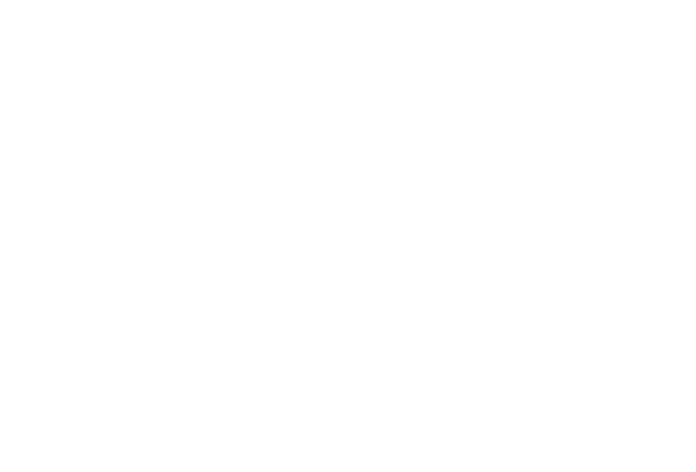

In [13]:
gROOT->GetListOfCanvases()->Draw()